# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [181]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [182]:
24

24

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [183]:
df.dropna(subset=['AVG_READING_8_SCORE'], inplace=True)

Find the average for your chosen test across all states in 2019

In [184]:
print(df["AVG_READING_8_SCORE"].unique())

mfrs = df.groupby("AVG_READING_8_SCORE")
mfrs["AVG_READING_8_SCORE"].mean()

[255. 260. 256. 252. 264. 270. 254. 236. 257. 249. 268. 262. 271. 261.
 269. 265. 251. 258. 266. 263. 253. 250. 267. 240. 272. 239. 273. 259.
 238. 274. 241. 242. 275. 248. 277. 276. 247. 278. 280.]


AVG_READING_8_SCORE
236.0    236.0
238.0    238.0
239.0    239.0
240.0    240.0
241.0    241.0
242.0    242.0
247.0    247.0
248.0    248.0
249.0    249.0
250.0    250.0
251.0    251.0
252.0    252.0
253.0    253.0
254.0    254.0
255.0    255.0
256.0    256.0
257.0    257.0
258.0    258.0
259.0    259.0
260.0    260.0
261.0    261.0
262.0    262.0
263.0    263.0
264.0    264.0
265.0    265.0
266.0    266.0
267.0    267.0
268.0    268.0
269.0    269.0
270.0    270.0
271.0    271.0
272.0    272.0
273.0    273.0
274.0    274.0
275.0    275.0
276.0    276.0
277.0    277.0
278.0    278.0
280.0    280.0
Name: AVG_READING_8_SCORE, dtype: float64

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [185]:
mfrs["AVG_READING_8_SCORE"].max()

AVG_READING_8_SCORE
236.0    236.0
238.0    238.0
239.0    239.0
240.0    240.0
241.0    241.0
242.0    242.0
247.0    247.0
248.0    248.0
249.0    249.0
250.0    250.0
251.0    251.0
252.0    252.0
253.0    253.0
254.0    254.0
255.0    255.0
256.0    256.0
257.0    257.0
258.0    258.0
259.0    259.0
260.0    260.0
261.0    261.0
262.0    262.0
263.0    263.0
264.0    264.0
265.0    265.0
266.0    266.0
267.0    267.0
268.0    268.0
269.0    269.0
270.0    270.0
271.0    271.0
272.0    272.0
273.0    273.0
274.0    274.0
275.0    275.0
276.0    276.0
277.0    277.0
278.0    278.0
280.0    280.0
Name: AVG_READING_8_SCORE, dtype: float64

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [186]:
df['Total_Enrollment'] = df['ENROLL'].fillna(df['ENROLL'])
df['EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['Total_Enrollment']
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,Total_Enrollment,EXPENDITURE_PER_STUDENT
306,1998_ALABAMA,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,...,43957.0,473954.0,205630.0,747980.0,NaN,NaN,211.0,255.0,739321.0,5.741800
308,1998_ARIZONA,ARIZONA,1998,794331.0,4675296.0,470398.0,2000801.0,2204097.0,4726098.0,2091741.0,...,45813.0,543670.0,224867.0,848262.0,NaN,NaN,206.0,260.0,794331.0,5.949784
309,1998_ARKANSAS,ARKANSAS,1998,456355.0,2567380.0,226475.0,1505419.0,835486.0,2536027.0,1367612.0,...,29123.0,282517.0,132507.0,452256.0,NaN,NaN,209.0,256.0,456355.0,5.557136
310,1998_CALIFORNIA,CALIFORNIA,1998,5727224.0,39183018.0,3149260.0,22840500.0,13193258.0,38087666.0,20083913.0,...,334852.0,3666271.0,1627284.0,5926037.0,NaN,NaN,202.0,252.0,5727224.0,6.650284
311,1998_COLORADO,COLORADO,1998,686360.0,4359021.0,215071.0,1879850.0,2264100.0,4739136.0,2253623.0,...,40076.0,436825.0,197136.0,699135.0,NaN,NaN,220.0,264.0,686360.0,6.904738


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

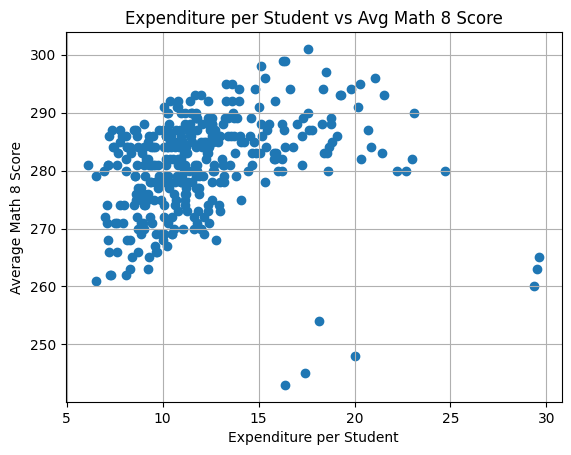

In [187]:
plt.scatter(data=df, x= 'EXPENDITURE_PER_STUDENT', y= 'AVG_MATH_8_SCORE')
plt.title("Expenditure per Student vs Avg Math 8 Score")
plt.xlabel("Expenditure per Student")
plt.ylabel("Average Math 8 Score")
plt.grid(True)
plt.show()

**<CAPTION FOR VIZ 1>**

**Visualization 2**

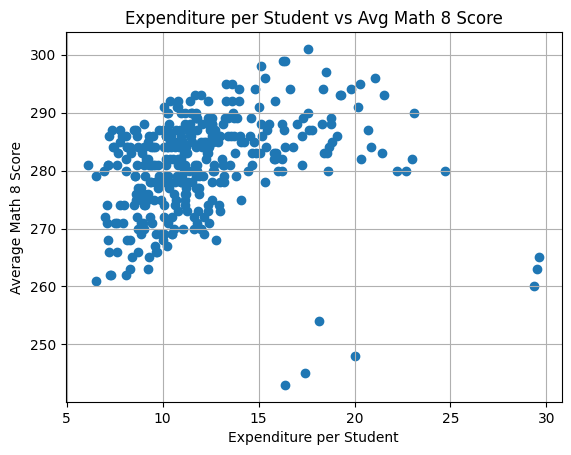

In [188]:
plt.scatter(data=df, x= 'EXPENDITURE_PER_STUDENT', y= 'AVG_MATH_8_SCORE')
plt.title("Expenditure per Student vs Avg Math 8 Score")
plt.xlabel("Expenditure per Student")
plt.ylabel("Average Math 8 Score")
plt.grid(True)
plt.show()

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X = df[["EXPENDITURE_PER_STUDENT", "TOTAL_REVENUE"]]
y = df["AVG_MATH_8_SCORE"]

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Put your actual test size
X_train_dropped = X_train.dropna()
y_train_dropped = y_train.loc[X_train_dropped.index]
y_train_dropped = y_train_dropped.dropna()
X_train_dropped = X_train_dropped.loc[y_train_dropped.index]
X_test_dropped = X_test.dropna()
y_test_dropped = y_test.loc[X_test_dropped.index]
y_test_dropped = y_test_dropped.dropna()
X_test_dropped = X_test_dropped.loc[y_test_dropped.index]

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [192]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [193]:
# create your model here
model = LinearRegression()
model.fit(X_train_dropped, y_train_dropped)

LinearRegression()

In [194]:
y_pred = model.predict(X_test_dropped)


## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [197]:
from sklearn.metrics import mean_squared_error, r2_score
meansq = r2_score(y_test_dropped, y_pred)

print(f'Mean Squared Error (MSE): [mse]')
print(f'R-squared (R:): [r2]')

Mean Squared Error (MSE): [mse]
R-squared (R:): [r2]


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

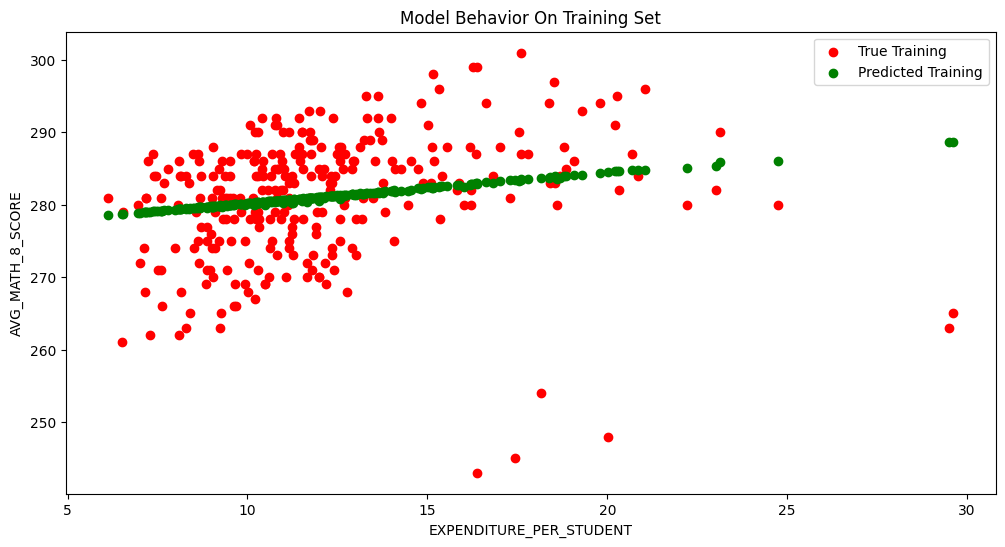

In [203]:
col_name = 'EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train_dropped[col_name], y_train_dropped, color = "red")
plt.scatter(X_train_dropped[col_name], model.predict(X_train_dropped), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")
plt.show()

Text(0.5, 1.0, 'Model Behavior on Testing Set')

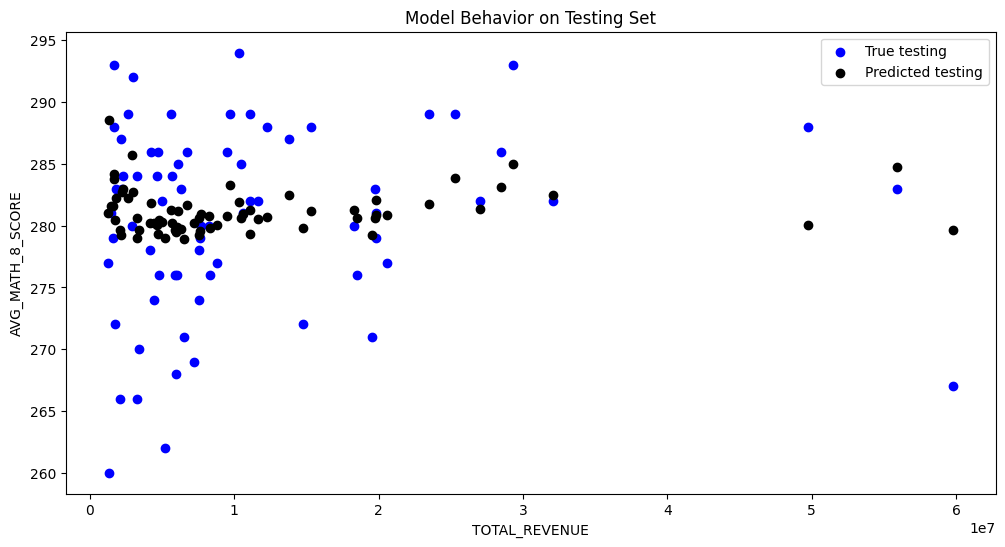

In [207]:
col_name = "TOTAL_REVENUE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test_dropped[col_name], y_test_dropped, color = "blue")
plt.scatter(X_test_dropped[col_name], model.predict(X_test_dropped), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

In [208]:
# First and foremost, I familiarized myself with matplotlib and further developed my python skills. As far as the 
# data plots, the first vizualization (graph) of Expenditure per Student over Math 8 Score showed what perceived to be
# a scattered, but linear nonetheless, growth of scores as the expenditure per student increased. In the second data 
# vizualization of Total Revenue and Average Math 8 score, I discovered that in the cluster of actual data points (blue 
# dots), many black dots (the predictions) were also present. Further, the plots of prediction and the plots of actual
# data would have appeared similar.
